In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load the training and test datasets
train_path = 'D:\\GSU-PhD\\AML\\Project\\orig-kaggle\\train.csv'
test_path = 'D:\\GSU-PhD\\AML\\Project\\orig-kaggle\\test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the dataset to understand the structure
train_data.head()


C:\Users\Mg\AppData\Local\Temp\ipykernel_19596\3807528828.py:5: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [4]:
test_data.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
2,p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Training set: ", train_data.shape)
print("Test set: ", test_data.shape)

Training set:  (177024, 508)
Test set:  (3644, 507)


In [6]:
bg_label = train_data.loc[:,"bg+1:00"]
bg_label

0         13.4
1         12.8
2         15.5
3         14.8
4         12.7
          ... 
177019    11.1
177020    10.9
177021    10.7
177022    10.5
177023    10.2
Name: bg+1:00, Length: 177024, dtype: float64

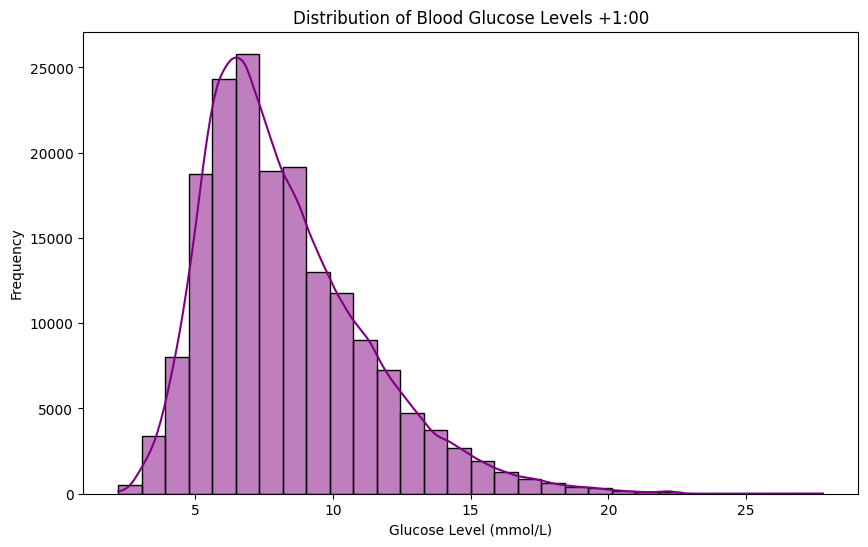

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['bg+1:00'], kde=True, bins=30, color='purple')
plt.title('Distribution of Blood Glucose Levels +1:00')
plt.xlabel('Glucose Level (mmol/L)')
plt.ylabel('Frequency')
plt.show()


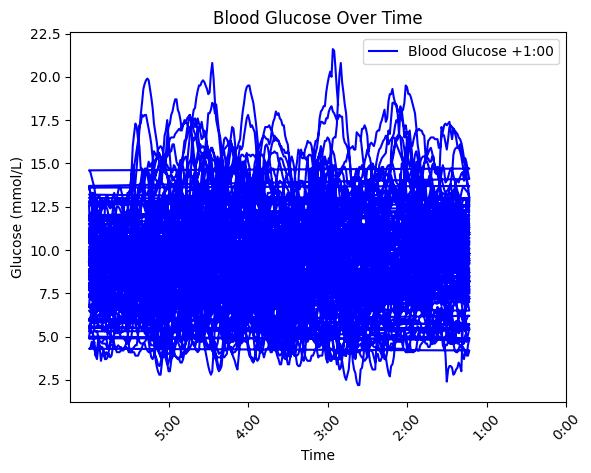

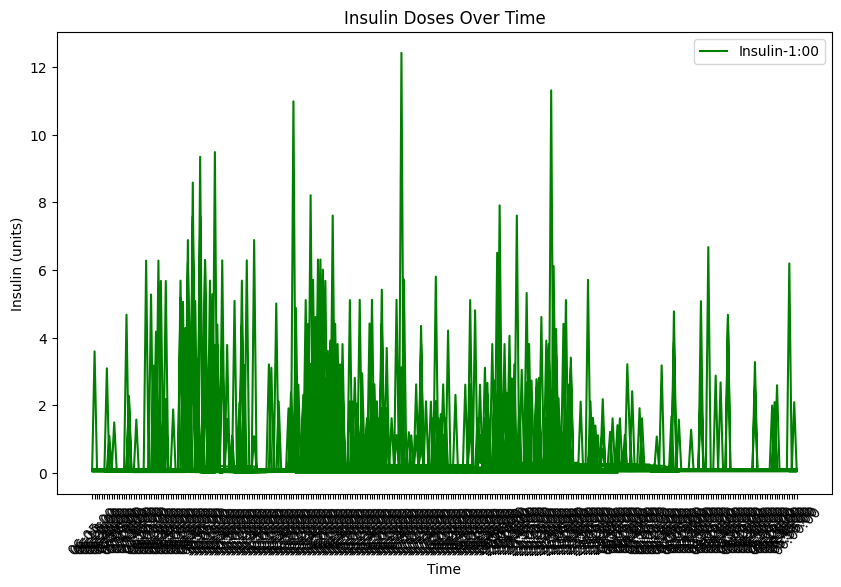

In [13]:
# Plot glucose levels and features over time for a random participant
participant_data = train_data[train_data['p_num'] == train_data['p_num'].sample(1).values[0]]
participant_data
# Plotting blood glucose readings
fig, ax = plt.subplots()
ax.plot(participant_data['time'], participant_data['bg-0:00'], label='Blood Glucose +1:00', color='blue')
plt.xlabel('Time')
plt.ylabel('Glucose (mmol/L)')
plt.title('Blood Glucose Over Time')
plt.xticks(rotation=45)
# Set the xtick locations and labels
ax.set_xticks([60, 120, 180, 240, 300, 360])
ax.set_xticklabels(['5:00', '4:00', '3:00', '2:00', '1:00', '0:00'])

plt.legend()
plt.show()

# Plotting insulin data
plt.figure(figsize=(10, 6))
plt.plot(participant_data['time'], participant_data['insulin-1:00'], label='Insulin-1:00', color='green')
plt.xlabel('Time')
plt.ylabel('Insulin (units)')
plt.title('Insulin Doses Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# Select numeric columns for correlation analysis
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix
correlation_matrix = train_data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()
